In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering

In [64]:
dataset = pd.read_csv('Bank-Customers (1).csv')
dataset.head(n=10)

,Cust_id,Age,Earning,Credit Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
5,6,22,17,76
6,7,35,18,6
7,8,23,18,94
8,9,64,19,3
9,10,30,19,72


In [65]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Cust_id       200 non-null    int64
 1   Age           200 non-null    int64
 2   Earning       200 non-null    int64
 3   Credit Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


Cust_id         0
Age             0
Earning         0
Credit Score    0
dtype: int64

In [66]:
dataset.drop('Cust_id',axis=1,inplace=True)
dataset.head(n=10)

,Age,Earning,Credit Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [67]:
X = dataset.iloc[:,[1,2]].values

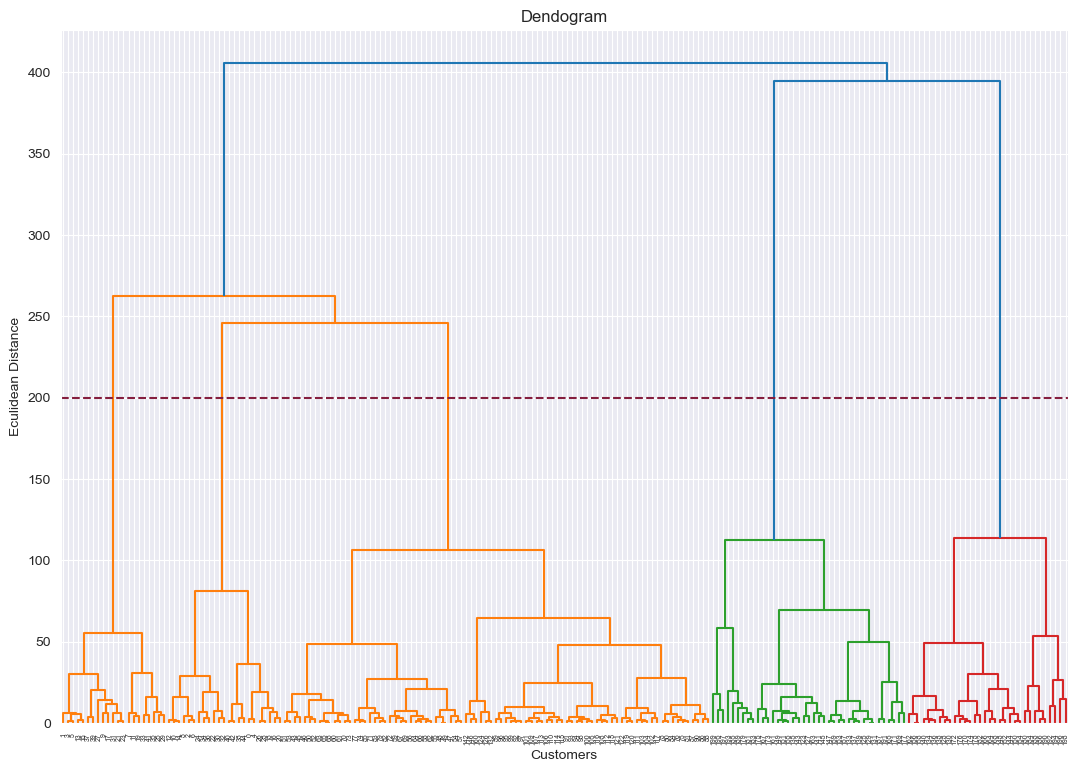

In [68]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=200,color='#851e3e',linestyle='--')
fig=plt.gcf()
fig.set_size_inches(13,9)
sns.set_style('darkgrid')
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eculidean Distance')
plt.show()

In [71]:

# from sklearn.cluster import AgglomerativeClustering
# hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
# y_hc=hc.fit_predict(X)


from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)


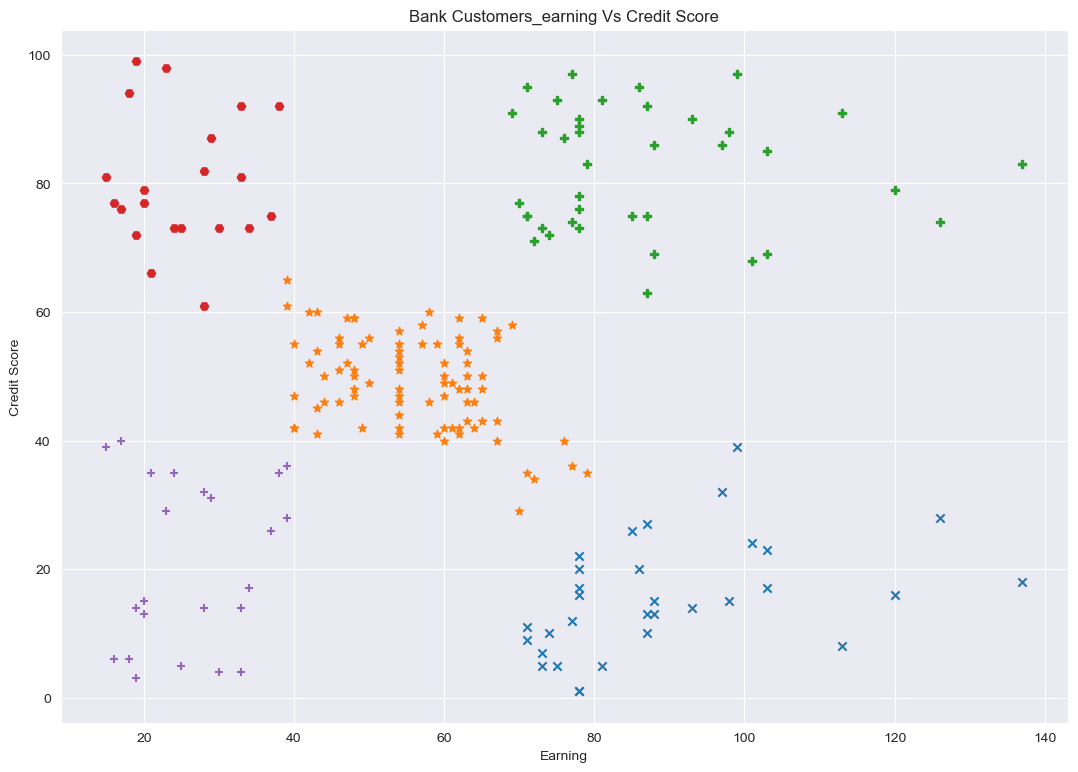

In [72]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],marker='x')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],marker='*')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],marker='P')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],marker='H')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],marker='+')
plt.title('Bank Customers_earning Vs Credit Score')
fig=plt.gcf()
fig.set_size_inches(13,9)
sns.set_style('darkgrid')
plt.xlabel('Earning')
plt.ylabel('Credit Score')
plt.show()


In [12]:


import pandas as pd
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


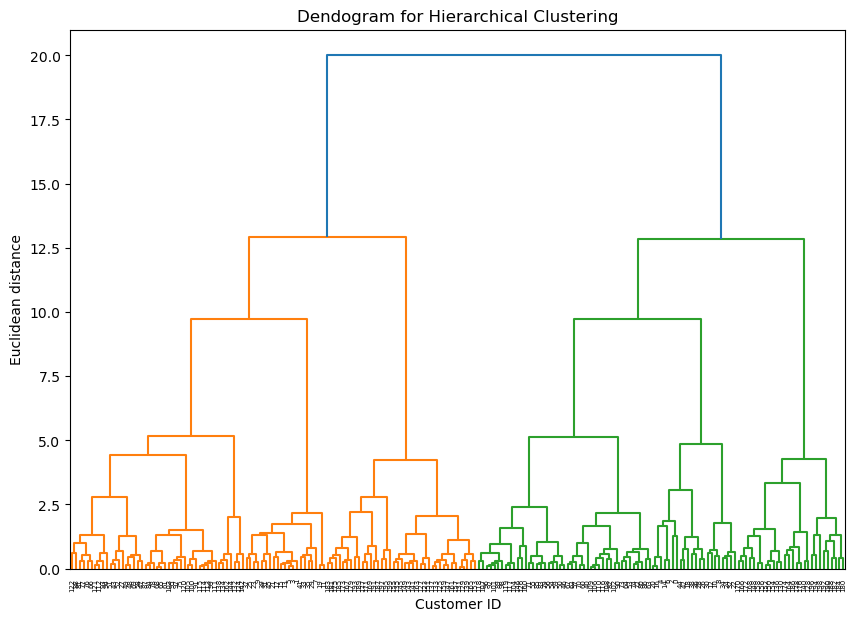

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch  # Import using sch alias
import matplotlib.pyplot as plt

# Read CSV data (moved to the beginning for logical flow)
data = pd.read_csv('Bank-Customers (1).csv')
df = pd.DataFrame(data)

# Select features
features = df[['Age', 'Earning', 'Credit Score']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering (using sch alias)
linked = sch.linkage(scaled_features, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)

plt.title("Dendogram for Hierarchical Clustering")
plt.xlabel("Customer ID")
plt.ylabel("Euclidean distance")
plt.show()